In [0]:
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from IPython.display import Image, display
import random
import copy
import numpy as np
from scipy.stats import norm
import math
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# from sklearn.tree._tree import TREE_LEAF

In [0]:
#Function to calculate de p value given z- value, error rate and number of elements
def calcP(f,n,z):
  p1 = f + z * math.sqrt((f*(1-f))/n)
  p2 = f - z * math.sqrt((f*(1-f))/n)
  if (p1 >= p2):
    return p1
  else:
    return p2

In [0]:
#Create nodes objects for all not leaf nodes in the tree, calculating the error rate and the p value for all of them
def confPrun(nodes, parents, leafs, z):
  ind = 0
  prun = []
  for i in nodes:
    if ind != 0:
      left = int(i[0])
      right = int(i[1])
      if (left != -1 or right != -1):
        if i[0] != -1:
          leafL = findLeaf(leafs, i[0]) 
        else:
          leafL = None
        if i[1] != -1:
          leafR = findLeaf(leafs, i[1])
        else:
          leafR = None
        createNode(parents, ind, leafL, leafR)
    ind = ind + 1
    
  for i in parents:
    
    if(i.leafL != None and i.leafR != None):
      f = ((i.leafL.erate * len(i.leafL.test)) + (i.leafR.erate * len(i.leafR.test))
      ) / (len(i.leafR.test) + len(i.leafL.test))
      n = len(i.leafR.test) + len(i.leafL.test)
      i.setErr(f)
      p = calcP(i, z, n)
      i.setp(p)

      sonP = ((i.leafL.p * len(i.leafL.test)) + (i.leafR.p * len(i.leafR.test))
      ) / (len(i.leafR.test) + len(i.leafL.test))

      if(sonP > i.p):
        prun.append(i)
  
  return(prun)

  


In [0]:
#Leaf class
class leaf:
  def __init__(self, idL):
    self.test = []
    self.idL = idL
    self.erate = 0
    self.p = 0
  
  def put(self,element):
    self.test.append(element)
  
  def setErr(self, errRate):
    self.erate = errRate
  
  def setp(self, p):
    self.p = p


In [0]:
#nodes class (Leaf parent)
class leafParent(leaf):
  def __init__(self, idL, leafL, leafR):
    leaf.__init__(self, idL) 
    self.leafL = leafL
    self.leafR = leafR
  
  def prunSon(self):
    self.leafL = None
    self.leafR = None
    
    

In [0]:
#Function to create nodes only if no other existing node have the same id (received as idL), leafL and leafR are indexes for node's sons. Received parameter 'nodes' is a list with all existing nodes
def createNode(nodes, idL, leafL, leafR):
  if newLeaf(nodes, idL):
    tempLeaf = leafParent(idL, leafL, leafR)
    nodes.append(tempLeaf)

In [0]:
#Function to create leafs only if no other existing leaf have the same id (received as idL). Received parameter 'leafs' is a list with all existing leafs
def createLeaf(leafs,idL):
  if newLeaf(leafs, idL):
    tempLeaf = leaf(idL)
    leafs.append(tempLeaf)
  

In [0]:
#function to calculate the error rate for a node 
def calcErr(leaf):
  plus = 0
  minus = 0
  minRate = 0
  for i in leaf.test:
    if i == 0:
      minus = minus + 1
    else:
      plus = plus + 1

  if(plus <= minus):
    minRate = plus
  else:
    minRate = minus
  err = minRate/len(leaf.test)
  leaf.setErr(err)

In [0]:
#Create leaf objects for all leafs in the tree, calculating the error rate and the p value for all of them
def leafsConfidence(z, yTest, predicted, predLeaf,leafs):
  for i in predLeaf:
    createLeaf(leafs, i)
  
  for i in leafs:
    ind = 0
    for j in predLeaf:
      if (i.idL == j):    
        if(yTest[ind] == predicted[ind]):
          i.test.append(1)
        else:
          i.test.append(0)
      ind = ind + 1

  for i in leafs:
    calcErr(i)
    calcP(i, z , len(i.test))

In [0]:
#Function to calculate de p value given a leaf object, error rate and number of elements
def calcP(leaf, z, n):
  if(n>0):
    f = leaf.erate 
    p1 = f + z * math.sqrt((f*(1-f))/n)
    p2 = f + z * math.sqrt((f*(1-f))/n)
    p = max(p1,p2)
    leaf.setp(p)
  else:
    p =  0
    leaf.setp(0)
  return p

In [0]:
#Function to know if a leaf with a certain id is already created
def newLeaf(leafs,idL):
  for i in leafs:
    if i.idL == idL:
      return False
  return True

In [0]:
#Function to find a leaf on a list given it id 
def findLeaf(leafs,idL):
  for i in leafs:
    if i.idL == idL:
      return i
  return None

#First classifier



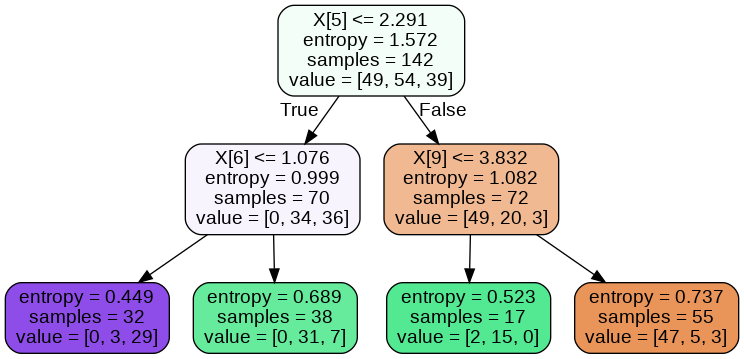


#Second classifier



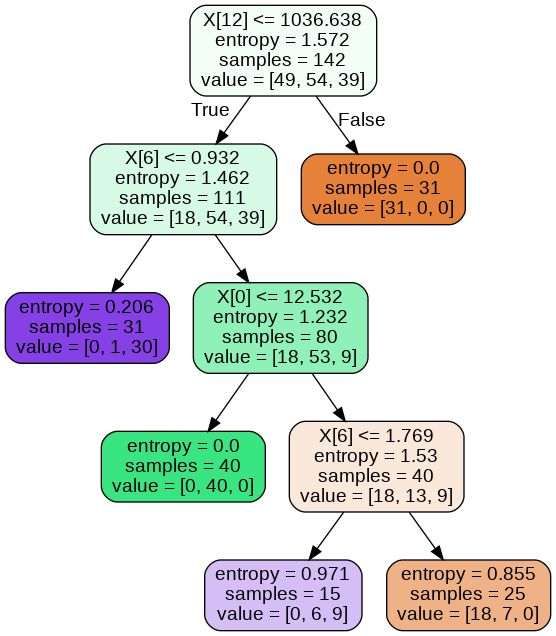



First and second classifier confusions matrix in that order




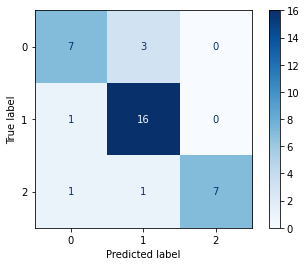

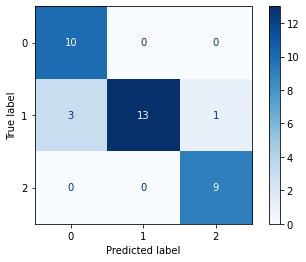

In [529]:
#Diferent depth
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#First classifier (spliter = best)
while True:
  clf1 = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "random",
      max_depth=None,
      min_samples_split= 2,
      min_samples_leaf=5,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      min_impurity_decrease=0.1,
      class_weight=None,
      ccp_alpha = 0.0)

  #Second classifier (spliter = random)
  clf2 = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "random",
      max_depth=None,
      min_samples_split= 2,
      min_samples_leaf=5,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      min_impurity_decrease=0.1,
      class_weight=None,
      ccp_alpha = 0.0)
  clf2 = clf2.fit(X_train, y_train)
  clf1 = clf1.fit(X_train, y_train)
  if(clf2.tree_.__getstate__()['max_depth'] != clf1.tree_.__getstate__()['max_depth']):
    break 
#First classifier
dot_data = tree.export_graphviz(clf1, out_file=None,filled=True,rounded=True) 
graph = graphviz.Source(dot_data, format = "png")
graph.render("./results/ds1".format(10)) 

#Second classifier
dot_data = tree.export_graphviz(clf2, out_file=None,filled=True,rounded=True) 
graph = graphviz.Source(dot_data, format = "png")
graph.render("./results/ds2".format(10))

#Print results
print('#First classifier')
print('')
display(Image('./results/ds1.png'))
print('')
print('#Second classifier')
print('')
display(Image('./results/ds2.png'))

#plot confusion matrix for the classifiers
disp = plot_confusion_matrix(clf1, X_test, y_test,
                                display_labels=None,
                                cmap=plt.cm.Blues,
                                normalize=None)  

disp = plot_confusion_matrix(clf2, X_test, y_test,
                                display_labels=None,
                                cmap=plt.cm.Blues,
                                normalize=None)  

print('')
print('')
print('First and second classifier confusion''s matrix in that order')
print('')
print('')







#First classifier



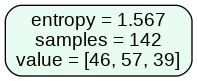


#Second classifier



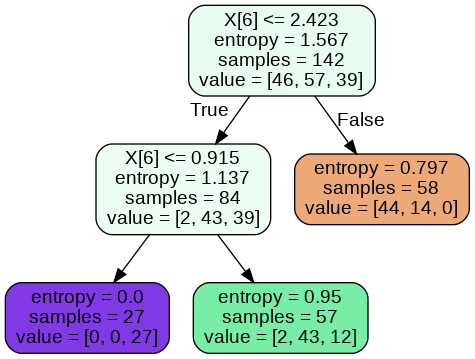



First and second classifier confusions matrix in that order




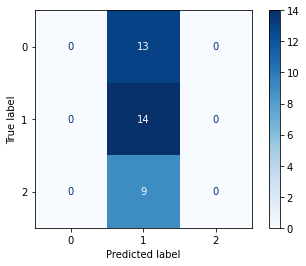

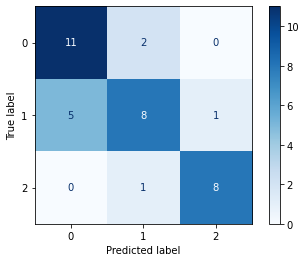

In [530]:
# No depth limit but different leafs number
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
while True:
  #First classifier (spliter = best)
  clf1 = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "random",
      max_depth=None,
      min_samples_split= 2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      min_impurity_decrease=0.3,
      class_weight=None,
      ccp_alpha = 0.2)
  clf1 = clf1.fit(X_train, y_train)
  y_pred = clf1.predict(X_test)


  #Second classifier (spliter = random)
  clf2 = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "random",
      max_depth=None,
      min_samples_split= 2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      min_impurity_decrease=0.2,
      class_weight=None,
      ccp_alpha = 0.0)
  clf2 = clf2.fit(X_train, y_train)

  if(sum(clf1.tree_.children_left) != sum(clf2.tree_.children_left)):
    break


#First classifier
dot_data = tree.export_graphviz(clf1, out_file=None,filled=True,rounded=True) 
graph = graphviz.Source(dot_data, format = "png")
graph.render("./results/ds1".format(10)) 

#Second classifier
dot_data = tree.export_graphviz(clf2, out_file=None,filled=True,rounded=True) 
graph = graphviz.Source(dot_data, format = "png")
graph.render("./results/ds2".format(10))

#Print results
print('#First classifier')
print('')
display(Image('./results/ds1.png'))
print('')
print('#Second classifier')
print('')
display(Image('./results/ds2.png'))

disp = plot_confusion_matrix(clf1, X_test, y_test,
                                display_labels=None,
                                cmap=plt.cm.Blues,
                                normalize=None)  

disp = plot_confusion_matrix(clf2, X_test, y_test,
                                display_labels=None,
                                cmap=plt.cm.Blues,
                                normalize=None)  

print('')
print('')
print('First and second classifier confusion''s matrix in that order')
print('')
print('')

#First classifier



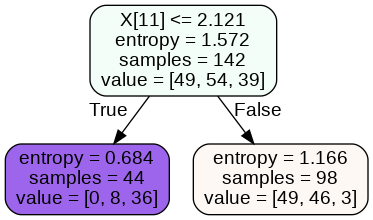


#Second classifier



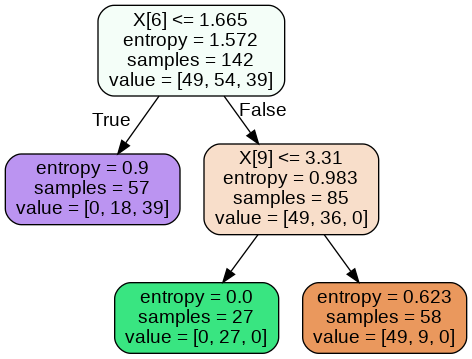



First and second classifier confusions matrix in that order




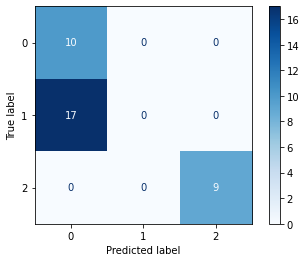

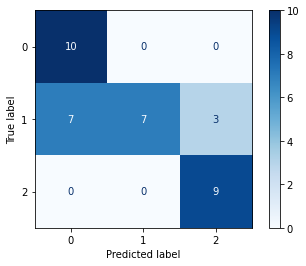

In [531]:
# No depth limit but different min_impurity_decrease
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#First classifier (spliter = best)
clf1 = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "random",
    max_depth=None,
    min_samples_split= 2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.4,
    class_weight=None,
    ccp_alpha = 0.2)
clf1 = clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)


#Second classifier (spliter = random)
clf2 = tree.DecisionTreeClassifier(
    criterion= "entropy",
    splitter= "random",
    max_depth=None,
    min_samples_split= 2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.2,
    class_weight=None,
    ccp_alpha = 0.0)
clf2 = clf2.fit(X_train, y_train)


#First classifier
dot_data = tree.export_graphviz(clf1, out_file=None,filled=True,rounded=True) 
graph = graphviz.Source(dot_data, format = "png")
graph.render("./results/ds1".format(10)) 

#Second classifier
dot_data = tree.export_graphviz(clf2, out_file=None,filled=True,rounded=True) 
graph = graphviz.Source(dot_data, format = "png")
graph.render("./results/ds2".format(10))

#Print results
print('#First classifier')
print('')
display(Image('./results/ds1.png'))
print('')
print('#Second classifier')
print('')
display(Image('./results/ds2.png'))

disp = plot_confusion_matrix(clf1, X_test, y_test,
                                display_labels=None,
                                cmap=plt.cm.Blues,
                                normalize=None)  

disp = plot_confusion_matrix(clf2, X_test, y_test,
                                display_labels=None,
                                cmap=plt.cm.Blues,
                                normalize=None)  

print('')
print('')
print('First and second classifier confusion''s matrix in that order')
print('')
print('')

In [0]:
def prune_index(inner_tree, i):
    # if there are shildren, visit them as well
    if inner_tree.children_left[i] != TREE_LEAF :
        prune_index(inner_tree, inner_tree.children_left[i])
        prune_index(inner_tree, inner_tree.children_right[i])
      # turn node into a leaf by "unlinking" its children
    inner_tree.children_left[i] = TREE_LEAF
    inner_tree.children_right[i] = TREE_LEAF
      


#First classifier



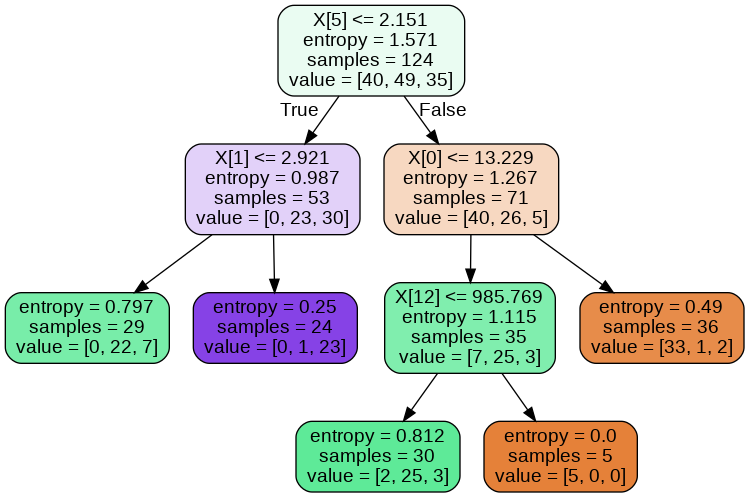

#Second classifier




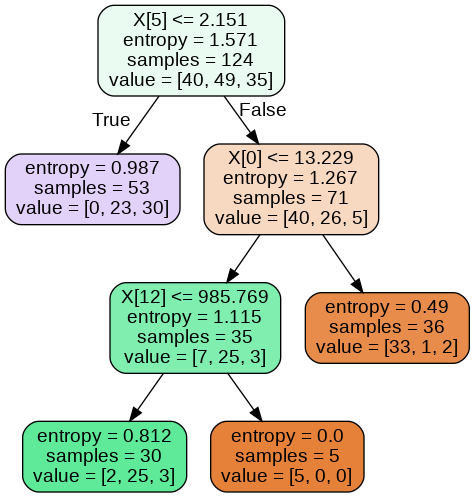



First and second classifier confusions matrix in that order




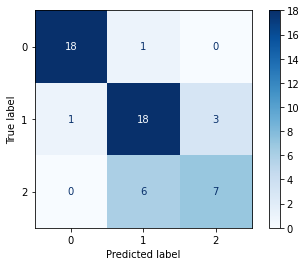

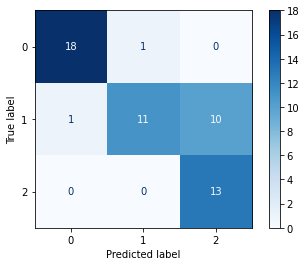

In [533]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
prunSw = 0
while (prunSw == 0):
    #Second classifier (spliter = random)
    clf2 = tree.DecisionTreeClassifier(
      criterion= "entropy",
      splitter= "random",
      max_depth=None,
      min_samples_split= 2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=random.randint(5, 8),
      min_impurity_decrease=0.01,
      class_weight=None,
      ccp_alpha = 0.0)
    clf2 = clf2.fit(X_train, y_train)
    y_pred = clf2.predict(X_test)
    # print('')
    # print('confusion_matrix')
    # print(confusion_matrix(y_test, y_pred))

    predicted = clf2.predict(X_test) 
    predLeaf = clf2.apply(X_test)
    leafs = []
    leafsConfidence(z, y_test, predicted, predLeaf,leafs)
    nodes = clf2.tree_.__getstate__()['nodes']
    parents = []
    z = norm.ppf(0.80,0,1)
    prun = confPrun(nodes, parents, leafs, z)
    deleteList = []

    #First classifier
    dot_data = tree.export_graphviz(clf2, out_file=None,filled=True,rounded=True) 
    graph = graphviz.Source(dot_data, format = "png")
    graph.render("./results/ds1".format(10)) 

    for i in prun:
      deleteList.append(i.idL)
    if len(deleteList)>0:
      prunSw = 1
      disp = plot_confusion_matrix(clf2, X_test, y_test,
                                display_labels=None,
                                cmap=plt.cm.Blues,
                                normalize=None)
      for i in deleteList:
        prune_index(clf2.tree_,i)

      #Second classifier
      dot_data = tree.export_graphviz(clf2, out_file=None,filled=True,rounded=True) 
      graph = graphviz.Source(dot_data, format = "png")
      graph.render("./results/ds2".format(10))

      #Print results
      print('#First classifier')
      print('')
      display(Image('./results/ds1.png'))

      print('#Second classifier')
      print('')
      disp = plot_confusion_matrix(clf2, X_test, y_test,
                                      display_labels=None,
                                      cmap=plt.cm.Blues,
                                      normalize=None)  
      print('')
      display(Image('./results/ds2.png'))
      print('')
      print('')
      print('First and second classifier confusion''s matrix in that order')
      print('')
      print('')
